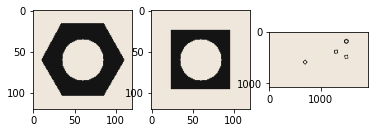

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Thershold value for hexnut_template.png = 116.0
Thershold value for squarenut_template.png = 116.0
Thershold value for conveyor_f100.png = 128.0


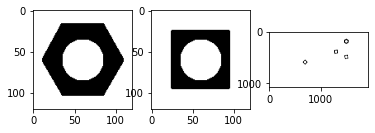

In [22]:
hexnut_template_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
squarenut_template_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

#convert above images using otsu binarization and gaussian blur used to filter he noise

blur1 = cv.GaussianBlur(hexnut_template_gray, (5,5), 0)
blur2 = cv.GaussianBlur(squarenut_template_gray, (5,5), 0)
blur3 = cv.GaussianBlur(conveyor_f100_gray, (5,5), 0)

ret1, th1 = cv.threshold(blur1, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2, th2 = cv.threshold(blur2, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3, th3 = cv.threshold(blur3, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

print('Thershold value for hexnut_template.png =',ret1)
print('Thershold value for squarenut_template.png =',ret2)
print('Thershold value for conveyor_f100.png =',ret3)

fig, ax  = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(th1, cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(th2, cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(th3, cv.COLOR_GRAY2RGB))
plt.show()



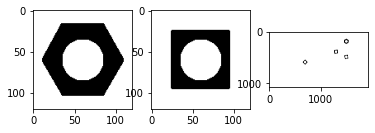

In [24]:
import cv2 as cv
import numpy as np

#remove small holes inside the foreground using morphological closing method
kernel = np.ones((3,3),np.uint8)

closing1 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel)
closing2 = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1,3)
ax[0].imshow(cv.cvtColor(closing1, cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(closing2, cv.COLOR_GRAY2RGB))
ax[2].imshow(cv.cvtColor(closing3, cv.COLOR_GRAY2RGB))
plt.show()